In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import magpylib as magpy
from Triangle import Triangle
from Trimag import Trimag
from numpy import linspace, array, meshgrid, log, radians, cos, sin


Dictionary Lookup for type: 'et'
Equalateral Triangle.
a: 3 b: 3 c: 3
All sides are present.
Isosceles triangle formed.
A axis vector: 0.00+2.60j
B axis vector: -2.25-1.30j
C axis vector: 2.25-1.30j
Centroid     : 1.50+0.87j
Satisfying!
a 3.00 A 60.00 b 3.00 B 60.00 c 3.00 C 60.00 h 2.60
Origin found.
Moving Origin to Location: MC
Origin Coordinates (x=1.50, y=0.87)
Making magnet from triangle object.
A triangle with some meat on it!
Using 3 magnets
Height:2.598 gap:0.000 width:0.866


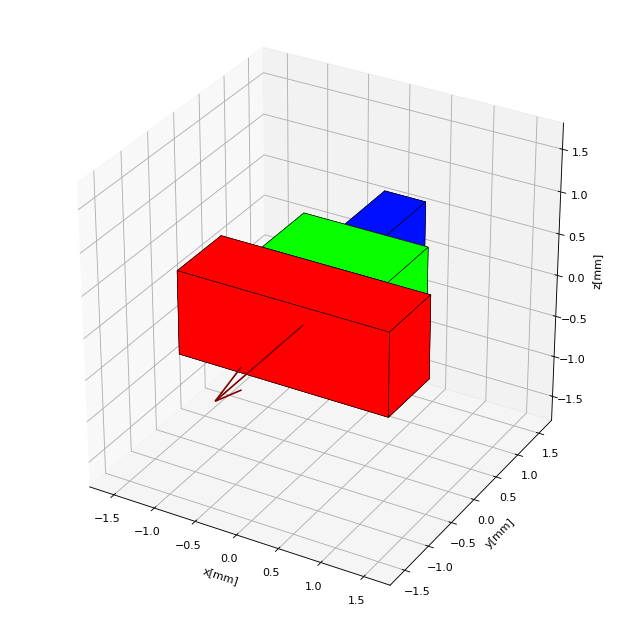

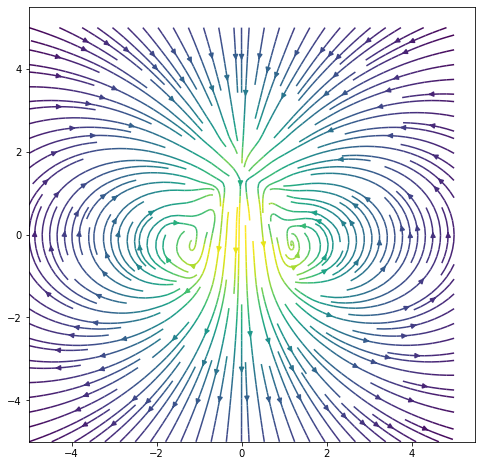

In [2]:
if __name__ == '__main__':
    my_triangle = Triangle(3, 0, 0, 0, 0, 0, 0, Typ='et')


    my_triangle.Origin('MC')

    my_trimag = Trimag(my_triangle, thick=1, num=3, mag=[0, -500, 0], gap=0)

#    print(my_trimag.BOM)
    

    fig1 = my_trimag.collect.displaySystem(suppress=True,direc=True)
    fig1.set_size_inches(8, 8)
    
    xs = linspace(-5,5,20)
    ys = linspace(-5,5,20)
    Bs = array([[my_trimag.collect.getB([x,y,0]) for x in xs] for y in ys])
    
    fig2, ax = plt.subplots()
    fig2.set_size_inches(8, 8)
    
    X,Y = meshgrid(xs,ys)
    U,V = Bs[:,:, 0], Bs[:,:,1]
    ##ax.streamplot(X, Y, U, V, color=np.log(U**2+V**2), density=1)
    ##ax.streamplot(X, Y, U, V, color=np.log(U**2+V**2), density=1)
    ax.streamplot(X, Y, U, V, color=log(U**2+V**2), density=2)
    
    plt.show()


Dictionary Lookup for type: 'et'
Equalateral Triangle.
a: 3 b: 3 c: 3
All sides are present.
Isosceles triangle formed.
A axis vector: 0.00+2.60j
B axis vector: -2.25-1.30j
C axis vector: 2.25-1.30j
Centroid     : 1.50+0.87j
Satisfying!
a 3.00 A 60.00 b 3.00 B 60.00 c 3.00 C 60.00 h 2.60
Origin found.
Moving Origin to Location: MC
Origin Coordinates (x=1.50, y=0.87)
Making moebius using 15 magnets spaced 24.0 degrees apart.


Magnet: trimag0
Making magnet from triangle object.
A triangle with some meat on it!
Using 12 magnets
Height:2.598 gap:0.000 width:0.217
Rotation about x: 90
Rotation about y: 0
Rotation about z: 90.0


Magnet: trimag1
Making magnet from triangle object.
A triangle with some meat on it!
Using 12 magnets
Height:2.598 gap:0.000 width:0.217
Rotation about x: -90
Rotation about y: 0
Rotation about z: -66.0


Magnet: trimag2
Making magnet from triangle object.
A triangle with some meat on it!
Using 12 magnets
Height:2.598 gap:0.000 width:0.217
Rotation about x: 90
Rota

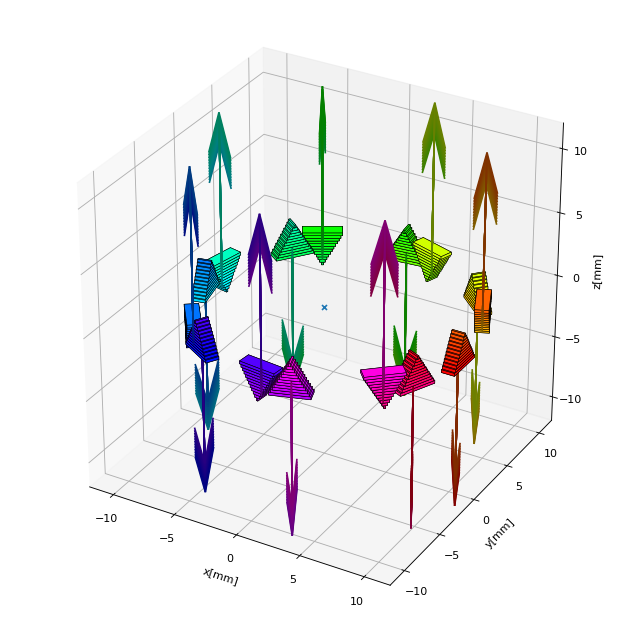

<Figure size 432x288 with 0 Axes>

                    3-Dimensional  X-Y-Z Coordinates


In [11]:




if __name__ == '__main__':
    #Magnitize the magnets all on the same axis.
    num_trimags = 15
    mag = [0, -1, 0]
    
    #Set the number of degrees to rotate around.
    theta = .0
    beta = 360 / num_trimags
    
    moebius = magpy.Collection()

    
    
    triangle = Triangle(3, 0, 0, 0, 0, 0, 0, Typ='et')
    triangle.Origin('MC')

    print('Making moebius using {} magnets spaced {} degrees apart.'.format(num_trimags, beta))
    
    for source in range(0, num_trimags, 1):

        
        # Apply the Moebius Formula...
        
        R = 10 # radius
        s = 0 # s in subset of {-w, w} (Zero aligns the center along the plane)
        t = radians(theta)

#Determine the position of the magnet in space.
        x_pos = (R + (s * cos(t/2))) * cos(t)
        y_pos = (R + (s * cos(t/2))) * sin(t)
        z_pos = s * sin(t/2)

        pos = [x_pos, y_pos, z_pos]

#Name the magnet...       
        name = 'trimag'+ str(source)
        
#Print magnet info...
        print('\n\n'+'Magnet:', name)

#Create the magnet...       
        name = Trimag(triangle, thick=1, num=12, mag=mag, gap=0)
#        print('Coordinates:', pos)
        
#Rotate the magnet around the x and y axis...
        if source % 2 == 0:
            x_rot = 90
            y_rot = 0
            z_rot = 90 + theta
            print('Rotation about x:', x_rot)
            print('Rotation about y:', y_rot)
            print('Rotation about z:', z_rot)
            name.collect.rotate(x_rot, axis=[1,0,0], anchor = [1, 0, 0])
            name.collect.rotate(y_rot, axis=[0,1,0], anchor = [1, 0, 0])
            name.collect.rotate(z_rot, axis=[0,0,1], anchor = [1, 0, 0])


        else:
            x_rot = -90
            y_rot = 0
            z_rot = -90 + theta
            print('Rotation about x:', x_rot)
            print('Rotation about y:', y_rot)
            print('Rotation about z:', z_rot)
            name.collect.rotate(x_rot, axis=[1,0,0], anchor = [1, 0, 0])
            name.collect.rotate(y_rot, axis=[0,1,0], anchor = [1, 0, 0])
            name.collect.rotate(z_rot, axis=[0,0,1], anchor = [1, 0, 0])


#Increment theta by beta
        theta = theta + beta
#End of making sources.     
        
        name.collect.move(pos)
        
#Add the magnet to the moebius collection of magnets...        
        moebius.addSources(name.collect)

#        
#Rotate the entire moebius collection 90 degrees + offset angle about axis y
#This put Mag1 on the 'bottom'.        
    rotation = 0
    tilt = 0
    moebius.rotate(rotation + tilt, [0, 1, 0], anchor=[1, 0, 0])
    




# plot the magnets on 3D coordinates...
    
    Fig1 = moebius.displaySystem(direc=True)
    plt.show()
    print('                    3-Dimensional  X-Y-Z Coordinates')
    

#Set the magnetic field display parameters...
    
#Magnetic Field Parameters
    density= 2
    map_size = 10
    sample_size = 10
    

# Show the individualt plane fields ( = 1) or not ( = 0)   
    show_fields_xy = 0
    show_fields_xz = 0
    show_fields_yz = 0
    
    x_map = 20
    y_map = 20
    z_map = 20
    
    x_sample = 10
    y_sample = 10
    z_sample = 10
    
    xs = linspace(-x_map,x_map,x_sample)
    ys = linspace(-y_map,y_map,y_sample)
    zs = linspace(-z_map,z_map,z_sample)
    

#Move the individual planes some offset to see 'layers' of the field.    
    xax_off = 0
    yax_off = 0
    zax_off = 0
    
#Show x-y plane field    
    if show_fields_xy == True:
        
        Bs = array([[moebius.getB([x,y,zax_off]) for x in xs] for y in ys])
        X,Y = meshgrid(xs,ys)
        S,T = Bs[:,:,0], Bs[:,:,1]
        
        Fig2, ax = plt.subplots(figsize=(6, 6), dpi=120)
        
        ax.streamplot(X, Y, S, T, color=log(S**2+T**2), cmap='nipy_spectral', density=density)
        plt.show()
        print('                        X-Y PLANE (TOP VIEW): Z={}'.format(zax_off))


 
#Show x-z plane field    
    if show_fields_xz == True:
    
        Bs = array([[moebius.getB([x,yax_off,z]) for x in xs] for z in zs])
        X,Z = meshgrid(xs,zs)
        U,V = Bs[:,:,0], Bs[:,:,2]
        
        Fig3, ay = plt.subplots(figsize=(6, 6), dpi=120)
        ay.streamplot(X, Z, U, V, color=log(U**2+V**2), cmap='nipy_spectral', \
                      density=density)
        plt.show()
        print('                        X-Z PLANE (SIDE VIEW): Y={}'.format(yax_off))


#Show y-z plane field    
    if show_fields_yz == True:
    
        Bs = array([[moebius.getB([xax_off,y,z]) for y in ys] for z in zs])
        Y,Z = meshgrid(ys,zs)
        W,X = Bs[:,:,1], Bs[:,:,2]
        
        Fig4, az = plt.subplots(figsize=(6, 6), dpi=120)
        az.streamplot(Y, Z, W, X, color=log(W**2+X**2), cmap='nipy_spectral', \
                      density=density)


        plt.show()
        print('                       Y-Z PLANE (FRONT VIEW): X={}'.format(xax_off))
